In [ ]:
The diabetes dataset was downloaded from Kaggle. It contains individual-level clinical, demographic, and lifestyle variables, with diabetes status as 
the primary outcome, enabling analysis of glycaemic markers, cardiometabolic comorbidities, and sociodemographic risk factors.

In [ ]:
# Load the libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# Load dataset

In [2]:
df = pd.read_csv(r"C:\Python\diabetes_dataset.csv")

In [ ]:
# Exploratory data analysis

In [5]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [6]:
df.tail()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0
99999,2016,Male,13.0,Wyoming,0,0,0,1,0,0,0,No Info,17.16,5.0,90,0


In [7]:
df.shape

(100000, 16)

In [8]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [11]:
df.dtypes

year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

In [13]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Data Cleaning

In [15]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [17]:
df.isnull().values.any()

np.False_

In [90]:
# #check for missing values, count them and print the sum for every column
df.isna().sum()
(df.isna().mean() * 100).round(2)
missing_summary = pd.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_Percent": (df.isna().mean() * 100).round(2)
}).sort_values(by="Missing_Percent", ascending=False)

missing_summary

,Missing_Count,Missing_Percent
year,0,0.0
gender,0,0.0
age,0,0.0
location,0,0.0
race:AfricanAmerican,0,0.0
race:Asian,0,0.0
race:Caucasian,0,0.0
race:Hispanic,0,0.0
race:Other,0,0.0
hypertension,0,0.0


In [91]:
# there are no null values in this dataset

# Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive statistics

In [24]:
#identify types of variables
numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns
categorical_vars = df.select_dtypes(include=["object", "category", "bool"]).columns

In [25]:
numeric_desc = df[numerical_vars].describe().T
numeric_desc

,count,mean,std,min,25%,50%,75%,max
year,99986.0,2018.360731,1.345312,2015.00,2019.00,2019.00,2019.00,2022.00
age,99986.0,41.885930,22.516409,0.08,24.00,43.00,60.00,80.00
race:AfricanAmerican,99986.0,0.202238,0.401671,0.00,0.00,0.00,0.00,1.00
race:Asian,99986.0,0.200098,0.400075,0.00,0.00,0.00,0.00,1.00
race:Caucasian,99986.0,0.198758,0.399067,0.00,0.00,0.00,0.00,1.00
race:Hispanic,99986.0,0.198898,0.399173,0.00,0.00,0.00,0.00,1.00
race:Other,99986.0,0.200008,0.400008,0.00,0.00,0.00,0.00,1.00
hypertension,99986.0,0.074860,0.263167,0.00,0.00,0.00,0.00,1.00
heart_disease,99986.0,0.039426,0.194606,0.00,0.00,0.00,0.00,1.00
bmi,99986.0,27.320767,6.637248,10.01,23.63,27.32,29.58,95.69


In [23]:
categorical_modes = df[categorical_vars].mode().iloc[0]
categorical_modes

gender              Female
location            Hawaii
smoking_history    No Info
Name: 0, dtype: object

In [26]:
# compute hbA1c_level
grouped_stats = df.groupby("hbA1c_level")[numerical_vars].agg(
    ["mean", "median", "std", "min", "max"]
)

grouped_stats

year                                      age         \
                    mean  median       std   min   max       mean median   
hbA1c_level                                                                
3.5          2018.350170  2019.0  1.360466  2015  2022  40.049569   40.0   
4.0          2018.346996  2019.0  1.353349  2015  2021  40.450776   41.0   
4.5          2018.368720  2019.0  1.341713  2015  2022  39.966989   40.0   
4.8          2018.374934  2019.0  1.330663  2015  2020  39.948346   40.0   
5.0          2018.376121  2019.0  1.334593  2015  2020  40.396675   41.0   
5.7          2018.356158  2019.0  1.351844  2015  2022  41.871907   43.0   
5.8          2018.343870  2019.0  1.360546  2015  2022  41.768293   43.0   
6.0          2018.367812  2019.0  1.333872  2015  2020  41.974129   43.0   
6.1          2018.350273  2019.0  1.355875  2015  2021  41.606178   42.0   
6.2          2018.350508  2019.0  1.353115  2015  2022  42.085641   43.0   
6.5          2018.375075  2019.0  1.329629  2015  2021  41.485961   42.0   
6.6          2018.383083  2019.0  1.328138  2015  2022  41.312994   42.0   
6.8          2018.344237  2019.0  1.327099  2015  2019  61.524922   63.0   
7.0          2018.419558  2019.0  1.272133  2015  2019  60.791798   62.0   
7.5          2018.292379  2019.0  1.408161  2015  2019  60.561431   62.0   
8.2          2018.332829  2019.0  1.366691  2015  2019  60.659607   62.0   
8.8          2018.325265  2019.0  1.380090  2015  2020  61.196672   63.0   
9.0          2018.266055  2019.0  1.429136  2015  2022  61.318043   62.0   

                                     ... blood_glucose_level         \
                   std    min   max  ...                mean median   
hbA1c_level                          ...                              
3.5          22.231564   0.08  80.0  ...          133.144088  140.0   
4.0          22.575012   0.16  80.0  ...          132.466773  140.0   
4.5          22.199137   0.08  80.0  ...          133.174469  140.0   
4.8          22.446982   0.08  80.0  ...          132.750790  140.0   
5.0          22.005095   0.08  80.0  ...          132.680498  140.0   
5.7          22.410730   0.08  80.0  ...          137.660485  140.0   
5.8          22.569386   0.08  80.0  ...          138.048197  140.0   
6.0          22.558895   0.08  80.0  ...          137.220856  140.0   
6.1          22.520647   0.08  80.0  ...          138.238569  140.0   
6.2          22.527641   0.08  80.0  ...          137.572327  140.0   
6.5          22.552178   0.08  80.0  ...          137.680421  140.0   
6.6          22.457150   0.08  80.0  ...          137.741097  140.0   
6.8          14.714448   9.00  80.0  ...          194.875389  160.0   
7.0          14.478208  10.00  80.0  ...          198.004732  200.0   
7.5          14.530252   7.00  80.0  ...          189.698289  160.0   
8.2          14.621094   7.00  80.0  ...          192.980333  160.0   
8.8          14.888598   4.00  80.0  ...          189.891074  159.0   
9.0          14.006772   6.00  80.0  ...          196.186544  160.0   

                                  diabetes                           
                   std  min  max      mean median       std min max  
hbA1c_level                                                          
3.5          34.286097   80  200  0.000000    0.0  0.000000   0   0  
4.0          34.199236   80  200  0.000000    0.0  0.000000   0   0  
4.5          34.089746   80  200  0.000000    0.0  0.000000   0   0  
4.8          34.082522   80  200  0.000000    0.0  0.000000   0   0  
5.0          34.338344   80  200  0.000000    0.0  0.000000   0   0  
5.7          40.344690   80  300  0.083690    0.0  0.276939   0   1  
5.8          40.329628   80  300  0.079207    0.0  0.270077   0   1  
6.0          39.953167   80  300  0.077999    0.0  0.268186   0   1  
6.1          40.551648   80  300  0.080890    0.0  0.272683   0   1  
6.2          40.367673   80  300  0.078374    0.0  0.268776   0   1  
6.5          40.57336

In [ ]:
Stratification by HbA1c level reveals a clear metabolic threshold associated with diabetes status. Lower HbA1c categories (≤6.6%) are characterized by 
younger individuals (mean age ≈ 40–42 years), lower blood glucose levels (≈130–140 mg/dL), and an absence or very low prevalence of diabetes. In 
contrast, HbA1c levels ≥6.8% correspond to markedly older individuals (mean age ≈ 60–63 years), substantially elevated blood glucose concentrations
(≈190–200 mg/dL), and a diabetes prevalence approaching 100%, confirming HbA1c as a strong discriminator of diabetes risk in the dataset

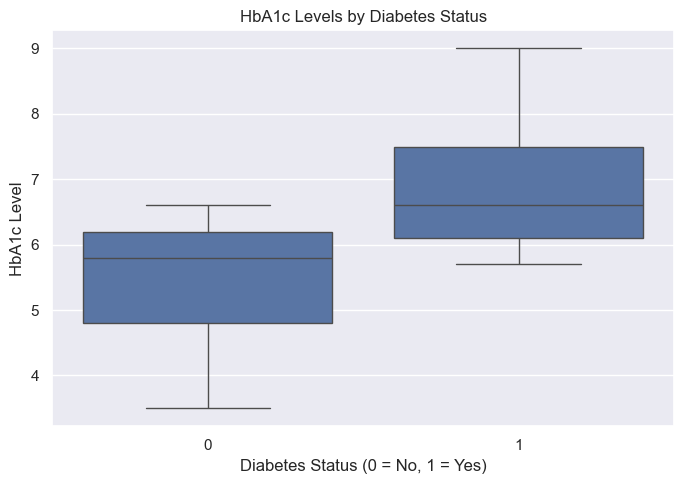

In [147]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_model,
    x="diabetes",
    y="hbA1c_level",
    showfliers=True
)

plt.title("HbA1c Levels by Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("HbA1c Level")
plt.tight_layout()
plt.show()

In [ ]:
HbA1c levels differed markedly by diabetes status. Individuals with diabetes exhibited a higher median HbA1c and greater dispersion compared with
non-diabetic individuals, indicating poorer and more heterogeneous glycaemic control. In contrast, the non-diabetic group showed lower HbA1c values with
a narrower interquartile range, consistent with more stable long-term glucose regulation.

In [27]:
grouped_stats = df.groupby("bmi")[numerical_vars].agg(
    ["mean", "median", "std", "min", "max"]
)

grouped_stats

year                                  age                           \
         mean  median       std   min   max   mean median        std    min   
bmi                                                                           
10.01  2015.5  2015.5  0.707107  2015  2016  44.00  44.00  50.911688   8.00   
10.08  2019.0  2019.0       NaN  2019  2019  38.00  38.00        NaN  38.00   
10.14  2019.0  2019.0       NaN  2019  2019  11.00  11.00        NaN  11.00   
10.19  2019.0  2019.0       NaN  2019  2019  39.00  39.00        NaN  39.00   
10.21  2019.0  2019.0       NaN  2019  2019   0.48   0.48        NaN   0.48   
...       ...     ...       ...   ...   ...    ...    ...        ...    ...   
88.72  2015.0  2015.0       NaN  2015  2015  45.00  45.00        NaN  45.00   
88.76  2019.0  2019.0       NaN  2019  2019  80.00  80.00        NaN  80.00   
91.82  2019.0  2019.0       NaN  2019  2019  38.00  38.00        NaN  38.00   
95.22  2019.0  2019.0       NaN  2019  2019  16.00  16.00        NaN  16.00   
95.69  2019.0  2019.0       NaN  2019  2019   7.00   7.00        NaN   7.00   

              ... blood_glucose_level                             diabetes  \
         max  ...                mean median        std  min  max     mean   
bmi           ...                                                            
10.01  80.00  ...               120.0  120.0  28.284271  100  140      0.0   
10.08  38.00  ...               130.0  130.0        NaN  130  130      0.0   
10.14  11.00  ...               160.0  160.0        NaN  160  160      0.0   
10.19  39.00  ...                85.0   85.0        NaN   85   85      0.0   
10.21   0.48  ...               126.0  126.0        NaN  126  126      0.0   
...      ...  ...                 ...    ...        ...  ...  ...      ...   
88.72  45.00  ...               300.0  300.0        NaN  300  300      1.0   
88.76  80.00  ...               140.0  140.0        NaN  140  140      0.0   
91.82  38.00  ...               160.0  160.0        NaN  160  160      0.0   
95.22  16.00  ...                90.0   90.0        NaN   90   90      0.0   
95.69   7.00  ...               130.0  130.0        NaN  130  130      0.0   

                           
      median  std min max  
bmi                        
10.01    0.0  0.0   0   0  
10.08    0.0  NaN   0   0  
10.14    0.0  NaN   0   0  
10.19    0.0  NaN   0   0  
10.21    0.0  NaN   0   0  
...      ...  ...  ..  ..  
88.72    1.0  NaN   1   1  
88.76    0.0  NaN   0   0  
91.82    0.0  NaN   0   0  
95.22    0.0  NaN   0   0  
95.69    0.0  NaN   0   0  

[4247 rows x 65 columns]

In [ ]:
The analysis shows that Stratification by BMI substantial heterogeneity in age, blood glucose level, and diabetes status across BMI values. Lower BMI 
categories are predominantly associated with younger individuals, lower blood glucose levels, and an absence of diabetes, whereas extremely high BMI 
values coincide with elevated blood glucose levels (often ≥300 mg/dL) and the presence of diabetes.

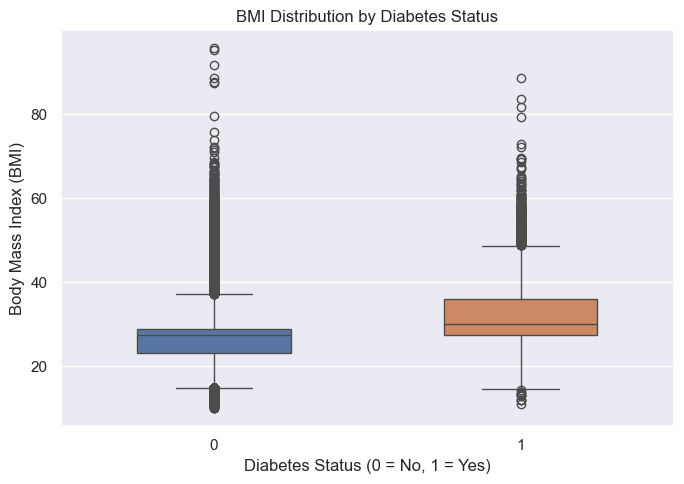

In [153]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_model,
    x="diabetes",
    y="bmi",
    hue="diabetes",
    palette=["#4C72B0", "#DD8452"],
    width=0.5,
    legend=False
)

plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Body Mass Index (BMI)")
plt.tight_layout()
plt.show()

In [ ]:
Individuals with diabetes exhibited a higher median BMI and greater variability compared with non-diabetic participants, indicating an association
between elevated body mass index and diabetes status, with substantial heterogeneity in adiposity among individuals with diabetes.

In [28]:
#compute blood glucose level vs diabetes
grouped_stats = df.groupby("blood_glucose_level")[numerical_vars].agg(
    ["mean", "median", "std", "min", "max"]
)

grouped_stats

year                                      age  \
                            mean  median       std   min   max       mean   
blood_glucose_level                                                         
80                   2018.313256  2019.0  1.383256  2015  2021  39.986749   
85                   2018.375906  2019.0  1.336317  2015  2022  39.910304   
90                   2018.351336  2019.0  1.351365  2015  2020  40.095606   
100                  2018.355587  2019.0  1.348655  2015  2022  40.542292   
126                  2018.384336  2019.0  1.325243  2015  2022  41.600868   
130                  2018.336156  2019.0  1.374796  2015  2022  41.812091   
140                  2018.382178  2019.0  1.328847  2015  2020  41.935437   
145                  2018.364809  2019.0  1.340892  2015  2021  41.588716   
155                  2018.370923  2019.0  1.331537  2015  2021  41.718917   
158                  2018.372331  2019.0  1.330078  2015  2021  40.193965   
159                  2018.370199  2019.0  1.337608  2015  2020  41.858721   
160                  2018.360005  2019.0  1.340994  2015  2022  42.224194   
200                  2018.349520  2019.0  1.358665  2015  2022  42.047869   
220                  2018.384743  2019.0  1.312311  2015  2019  61.877280   
240                  2018.411950  2019.0  1.301767  2015  2020  61.800314   
260                  2018.354331  2019.0  1.363839  2015  2022  61.637795   
280                  2018.319616  2019.0  1.392942  2015  2019  60.721536   
300                  2018.351632  2019.0  1.347312  2015  2019  60.419881   

                                                    ... blood_glucose_level  \
                    median        std    min   max  ...                mean   
blood_glucose_level                                 ...                       
80                    40.0  22.279234   0.08  80.0  ...                80.0   
85                    40.0  22.340909   0.08  80.0  ...                85.0   
90                    40.0  22.243163   0.08  80.0  ...                90.0   
100                   41.0  22.364372   0.16  80.0  ...               100.0   
126                   43.0  22.533488   0.08  80.0  ...               126.0   
130                   43.0  22.645579   0.08  80.0  ...               130.0   
140                   43.0  22.544242   0.08  80.0  ...               140.0   
145                   43.0  22.611884   0.08  80.0  ...               145.0   
155                   43.0  22.437301   0.08  80.0  ...               155.0   
158                   40.0  22.220796   0.08  80.0  ...               158.0   
159                   43.0  22.465422   0.08  80.0  ...               159.0   
160                   44.0  22.436426   0.08  80.0  ...               160.0   
200                   43.0  22.465749   0.08  80.0  ...               200.0   
220                   64.0  14.238764   6.00  80.0  ...               220.0   
240                   63.0  14.580412   4.00  80.0  ...               240.0   
260                   63.0  13.908369   4.00  80.0  ...               260.0   
280                   62.0  14.547406   4.00  80.0  ...               280.0   
300                   62.0  14.677017  13.00  80.0  ...               300.0   

                                           diabetes                           
                    median  std  min  max      mean median       std min max  
blood_glucose_level                                                           
80                    80.0  0.0   80   80  0.000000    0.0  0.000000   0   0  
85                    85.0  0.0   85   85  0.000000    0.0  0.000000   0   0  
90                    90.0  0.0   90   90  0.000000    0.0  0.000000   0   0  
100                  100.0  0.0  100  100  0.000000    0.0  0.000000   0   0  
126                  126.0  0.0  126  126  0.082608    0.0  0.275307   0   1  
130                  130.0  0.0  130  130  0.088786    0.0  0.284453   0   1  
140                  140.0  0.0  140  1

In [ ]:
Lower glucose categories (80–140 mg/dL) are dominated by younger individuals (mean age ≈ 40–42 years) with near-zero diabetes prevalence, while higher 
glucose levels (≥220 mg/dL) correspond to markedly older individuals (mean age ≈ 60–62 years) and a diabetes prevalence of 100%. This pattern indicates 
a strong positive relationship between blood glucose concentration, increasing age, and diabetes status, supporting blood glucose level as a highly 
discriminative indicator of diabetes risk

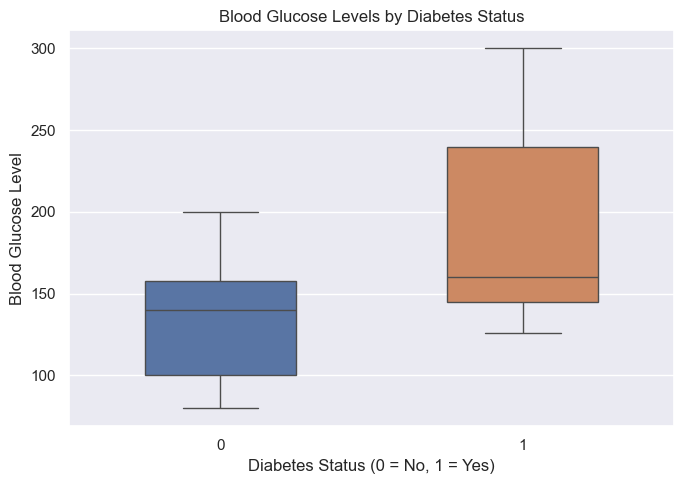

In [151]:
# boxplot
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_model,
    x="diabetes",
    y="blood_glucose_level",
    hue="diabetes",          # REQUIRED for palette
    palette=["#4C72B0", "#DD8452"],
    width=0.5,
    legend=False             # remove redundant legend
)

plt.title("Blood Glucose Levels by Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Blood Glucose Level")
plt.tight_layout()
plt.show()

In [ ]:
Blood glucose levels were higher and more variable among individuals with diabetes compared with non-diabetic participants, indicating impaired 
glycaemic regulation in the diabetic group and supporting blood glucose as a key discriminator of diabetes status.

In [29]:
grouped_stats = df.groupby("diabetes")[numerical_vars].agg(
    ["mean", "median", "std", "min", "max"]
)

grouped_stats

year                                      age         \
                 mean  median       std   min   max       mean median   
diabetes                                                                
0         2018.362143  2019.0  1.344196  2015  2022  40.114997   40.0   
1         2018.345529  2019.0  1.357247  2015  2022  60.946588   62.0   

                                 ... blood_glucose_level                    \
                std   min   max  ...                mean median        std   
diabetes                         ...                                         
0         22.305493  0.08  80.0  ...          132.853267  140.0  34.247070   
1         14.549880  3.00  80.0  ...          194.094706  160.0  58.641111   

                   diabetes                      
          min  max     mean median  std min max  
diabetes                                         
0          80  200      0.0    0.0  0.0   0   0  
1         126  300      1.0    1.0  0.0   1   1  

[2 rows x 65 columns]

In [ ]:
Participants with diabetes were substantially older (mean age ≈ 61 years) compared to non-diabetic individuals (mean age ≈ 40 years). Blood glucose
levels were considerably higher among diabetic participants (mean ≈ 194 mg/dL) than among non-diabetic participants (mean ≈ 133 mg/dL), with greater 
variability observed in the diabetic group.

# Correlation analysis between continuous variables

In [ ]:
# Pearson correlation

In [32]:
from scipy.stats import pearsonr

In [39]:
cols = ["age", "blood_glucose_level", "bmi", "hbA1c_level"]

df_clean = (
    df[cols]
    .apply(pd.to_numeric, errors="coerce")
    .dropna()
)

print("Rows used:", df_clean.shape[0])

Rows used: 99986


In [40]:
# Pearsson correlation between

# ri: age and blood_glucose_level
r1, p1 = pearsonr(df_clean["age"], df_clean["blood_glucose_level"])
print("Age vs Blood Glucose → r =", round(r1, 3), ", p =", round(p1, 5))

# r2: bmi and hbA1c_level
r2, p2 = pearsonr(df_clean["bmi"], df_clean["hbA1c_level"])
print("BMI vs HbA1c → r =", round(r2, 3), ", p =", round(p2, 5))

# r3: blood_glucose_level and hbA1c_level
r3, p3 = pearsonr(df_clean["blood_glucose_level"], df_clean["hbA1c_level"])
print("Blood Glucose vs HbA1c → r =", round(r3, 3), ", p =", round(p3, 5))

# r4: age and bmi
r4, p4 = pearsonr(df_clean["age"], df_clean["bmi"])
print("Age vs BMI → r =", round(r4, 3), ", p =", round(p4, 5))

Age vs Blood Glucose → r = 0.111 , p = 0.0
BMI vs HbA1c → r = 0.083 , p = 0.0
Blood Glucose vs HbA1c → r = 0.167 , p = 0.0
Age vs BMI → r = 0.337 , p = 0.0


In [ ]:
Pearson correlation analysis showed a weak positive association between age and blood glucose level (r = 0.111, p < 0.001), indicating that blood 
glucose tends to increase slightly with age. BMI demonstrated a weak positive correlation with HbA1c (r = 0.083, p < 0.001), suggesting a modest 
relationship between adiposity and long-term glycaemic control. A small but statistically significant association was also observed between blood 
glucose level and HbA1c (r = 0.167, p < 0.001). In contrast, age and BMI exhibited a moderate positive correlation (r = 0.337, p < 0.001), 
reflecting increasing body mass with advancing age.

in conclusion, all associations are statistically significant but effect sizes are small, except for age–BMI, suggesting multifactorial diabetes risk,
not dominance of a single predictor.

In [ ]:
# Spearman rank correlation

In [42]:
from scipy.stats import spearmanr

In [44]:
# Spearman Rank correlation

# ri: age and blood_glucose_level
r1, p1 = spearmanr(df_clean["age"], df_clean["blood_glucose_level"])
print("Age vs Blood Glucose → Spearman r =", round(r1, 3), ", p <", 0.001 if p1 < 0.001 else round(p1, 5))

# r2: bmi and hbA1c_level
r2, p2 = spearmanr(df_clean["bmi"], df_clean["blood_glucose_level"])
print("BMI vs Blood Glucose → Spearman r =", round(r2, 3), ", p <", 0.001 if p2 < 0.001 else round(p2, 5))

# r3: blood_glucose_level and hbA1c_level
r3, p3 = spearmanr(df_clean["hbA1c_level"], df_clean["blood_glucose_level"])
print("HbA1c vs Blood Glucose → Spearman r =", round(r3, 3), ", p <", 0.001 if p3 < 0.001 else round(p3, 5))

# r4: age and bmi
r4, p4 = spearmanr(df_clean["age"], df_clean["hbA1c_level"])
print("Age vs HbA1c → Spearman r =", round(r4, 3), ", p <", 0.001 if p4 < 0.001 else round(p4, 5))

Age vs Blood Glucose → Spearman r = 0.075 , p < 0.001
BMI vs Blood Glucose → Spearman r = 0.058 , p < 0.001
HbA1c vs Blood Glucose → Spearman r = 0.091 , p < 0.001
Age vs HbA1c → Spearman r = 0.084 , p < 0.001


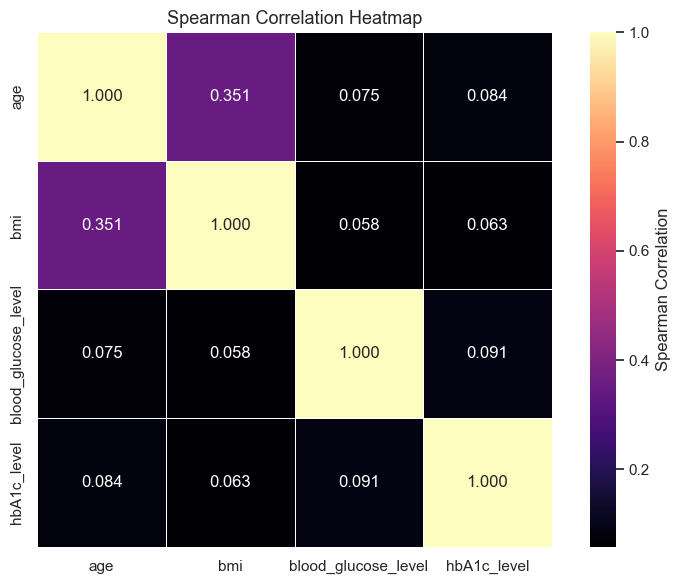

In [142]:
# define variables FIRST
vars_corr = ["age", "bmi", "blood_glucose_level", "hbA1c_level"]

# compute Spearman correlation
corr_matrix = df_clean[vars_corr].corr(method="spearman")

# plot heatmap with numbers inside boxes
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".3f",
    cmap="magma",
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Spearman Correlation"}
)

plt.title("Spearman Correlation Heatmap", fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
Spearman’s rank correlation analysis revealed weak but statistically significant positive associations between age and blood glucose level (rₛ = 0.075,
p < 0.001) and between BMI and blood glucose level (rₛ = 0.058, p < 0.001). A similarly weak positive relationship was observed between HbA1c and blood
glucose level (rₛ = 0.091, p < 0.001), indicating that higher long-term glycaemic exposure corresponds modestly with higher current glucose levels. Age 
was also weakly associated with HbA1c (rₛ = 0.084, p < 0.001), suggesting a gradual increase in chronic glycaemic burden with advancing age.

In [ ]:
# Multicolinearity using Variance Inflation Factor (VIF) for your diabetes predictors.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# compute diabetes continous predictors
features = ["age", "bmi", "blood_glucose_level", "hbA1c_level"]

X = (
    df[features]
    .apply(pd.to_numeric, errors="coerce")
    .dropna()
)

X_const = np.column_stack([np.ones(X.shape[0]), X])

vif_data = pd.DataFrame()
vif_data["Variable"] = ["Intercept"] + features
vif_data["VIF"] = [
    variance_inflation_factor(X_const, i)
    for i in range(X_const.shape[1])
]

vif_data

,Variable,VIF
0,Intercept,46.557270
1,age,1.141663
2,bmi,1.134407
3,blood_glucose_level,1.040699
4,hbA1c_level,1.037994


In [ ]:
Variance Inflation Factor (VIF) analysis indicated no evidence of multicollinearity among the predictor variables. All explanatory variables—age 
(VIF = 1.14), BMI (VIF = 1.13), blood glucose level (VIF = 1.04), and HbA1c level (VIF = 1.04)—had VIF values well below the commonly accepted 
thresholds (VIF < 5). This suggests that the predictors contribute independent information to the model

In [ ]:
# Phi coefficient

In [47]:
from scipy.stats import chi2_contingency

In [48]:
# clean binar variables
binary_vars = ["diabetes", "hypertension", "heart_disease"]

df_bin = (
    df[binary_vars]
    .apply(pd.to_numeric, errors="coerce")
    .dropna()
    .astype(int)
)

print("Rows used:", df_bin.shape[0])

Rows used: 99986


In [52]:
# Define Phi coefficient function
def phi_coefficient(x, y):
    table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(table)
    n = table.values.sum()
    return np.sqrt(chi2 / n)

In [54]:
# Compute Chi coefficients
# diabetes and hypertension
phi_d_htn = phi_coefficient(df_bin["diabetes"], df_bin["hypertension"])
print("Phi (Diabetes vs Hypertension) =", round(phi_d_htn, 3))

# diabetes and heart disease
phi_d_hd = phi_coefficient(df_bin["diabetes"], df_bin["heart_disease"])
print("Phi (Diabetes vs Heart Disease) =", round(phi_d_hd, 3))

# hypertension and heart disease
phi_htn_hd = phi_coefficient(df_bin["hypertension"], df_bin["heart_disease"])
print("Phi (Hypertension vs Heart Disease) =", round(phi_htn_hd, 3))

Phi (Diabetes vs Hypertension) = 0.198
Phi (Diabetes vs Heart Disease) = 0.172
Phi (Hypertension vs Heart Disease) = 0.121


In [ ]:
Phi coefficient analysis indicated a weak-to-moderate association between diabetes and hypertension (Φ = 0.198), suggesting partial overlap in 
cardiometabolic risk profiles. A weak association was observed between diabetes and heart disease (Φ = 0.172), indicating that while related, heart
disease is not universally present among individuals with diabetes. The association between hypertension and heart disease was also weak (Φ = 0.121),
reflecting modest comorbidity within the study population.

In [ ]:
# from scipy.stats import chi2_contingency

In [60]:
# Define Cramér’s V function

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(table)
    n = table.values.sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [63]:
# Race and diabetes
race_cols = [col for col in df.columns if col.startswith("race")]

for col in race_cols:
    v = cramers_v(df[col], df["diabetes"])
    print(f"Cramér’s V ({col} vs diabetes) = {round(v, 3)}")

Cramér’s V (race:AfricanAmerican vs diabetes) = 0.004
Cramér’s V (race:Asian vs diabetes) = 0.004
Cramér’s V (race:Caucasian vs diabetes) = 0.002
Cramér’s V (race:Hispanic vs diabetes) = 0.001
Cramér’s V (race:Other vs diabetes) = 0.005


# Behavioural, racial and demograpghic indicators of cardiometabolic disease

In [72]:
# Smoking History and Diabetes
smoking_history_cols = [c for c in df.columns if c.startswith("smoking_history")]

for col in smoking_history_cols:
    v = cramers_v(df[col], df["diabetes"])
    print(f"Cramér’s V ({col} vs diabetes) = {round(v, 3)}")

Cramér’s V (smoking_history vs diabetes) = 0.14


In [74]:
# location and diabetes
location_cols = [c for c in df.columns if c.startswith("location")]

for col in location_cols:
    v = cramers_v(df[col], df["diabetes"])
    print(f"Cramér’s V ({col} vs diabetes) = {round(v, 3)}")

Cramér’s V (location vs diabetes) = 0.026


In [ ]:
Cramér’s V analysis indicated negligible associations between race and diabetes status, with all race-specific coefficients below 0.01, suggesting no
meaningful relationship between racial categories and diabetes in the dataset. Smoking history showed a weak association with diabetes 
(Cramér’s V = 0.14), indicating a modest relationship between smoking behaviour and diabetes prevalence. In contrast, location exhibited a very weak
association with diabetes (Cramér’s V = 0.03), implying minimal geographic variation in diabetes status.

in conclusion, No practical association between race and diabetes. Smoking history has Weak but meaningful association while association between
location and and diabetes is negligible.

# Trend over the year

In [121]:
# Ensure correct data types
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["diabetes"] = pd.to_numeric(df["diabetes"], errors="coerce")

df_trend = df[["year", "diabetes"]].dropna()

# compute annual diabetes prevalence
diabetes_trend = (
    df_trend
    .groupby("year")["diabetes"]
    .mean()
    .reset_index()
)

diabetes_trend["prevalence_percent"] = diabetes_trend["diabetes"] * 100

diabetes_trend

,year,diabetes,prevalence_percent
0,2015,0.086644,8.664384
1,2016,0.087329,8.732877
2,2018,0.090739,9.073936
3,2019,0.084371,8.437120
4,2020,0.071429,7.142857
5,2021,0.142857,14.285714
6,2022,0.250000,25.000000


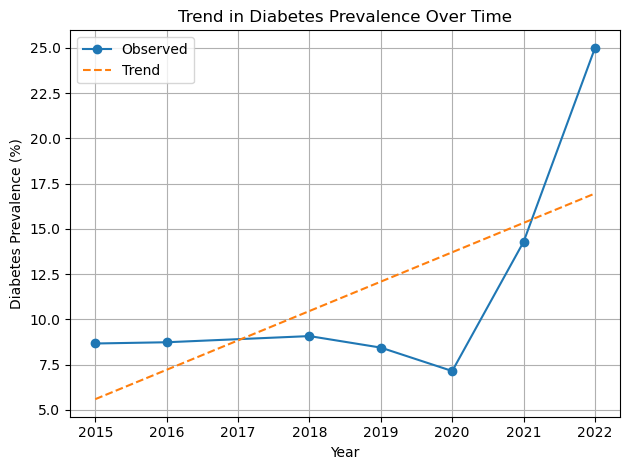

In [123]:
# diabetes prevalence trend over time (with trend line)
z = np.polyfit(
    diabetes_trend["year"],
    diabetes_trend["prevalence_percent"],
    1
)

p = np.poly1d(z)

plt.figure()
plt.plot(diabetes_trend["year"],
         diabetes_trend["prevalence_percent"],
         marker="o", label="Observed")

plt.plot(diabetes_trend["year"],
         p(diabetes_trend["year"]),
         linestyle="--", label="Trend")

plt.xlabel("Year")
plt.ylabel("Diabetes Prevalence (%)")
plt.title("Trend in Diabetes Prevalence Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
The trend analysis shows that diabetes prevalence remained relatively stable between 2015 and 2019, fluctuating around 8–9%. A noticeable decline was 
observed in 2020, where prevalence dropped to approximately 7%, possibly reflecting disruptions in healthcare access, diagnosis, or reporting during
that period. However, this decline was followed by a sharp increase from 2021 onwards, with prevalence rising markedly to about 14% in 2021 and reaching
approximately 25% in 2022.

The fitted linear trend line indicates an overall increasing trajectory in diabetes prevalence across the study period, despite short-term fluctuations.
This suggests a growing diabetes burden over time, with the most pronounced increase occurring in the later years of the dataset.

# Machine Learning

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
#define outcome and predict variables
target = "diabetes"

features = [
    "age",
    "bmi",
    "blood_glucose_level",
    "hbA1c_level",
    "hypertension",
    "heart_disease"
]

df_model = df[features + [target]].copy()

df_model = df_model.apply(pd.to_numeric, errors="coerce")
df_model = df_model.dropna()

print(df_model[target].value_counts())

diabetes
0    91486
1     8500
Name: count, dtype: int64


In [ ]:
The analysis revealed a pronounced class imbalance in the diabetes outcome variable. The majority of individuals were classified as non-diabetic 
(n = 91,486; 91.5%), while a substantially smaller proportion were classified as diabetic (n = 8,500; 8.5%). 

In [ ]:
# module 1: logistics regretion

In [102]:
# Train_Test split
X = df_model[features]
y = df_model[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Model 1. Logistic Regression (baseline)

In [103]:
log_reg = LogisticRegression(
    solver="liblinear",   # most stable for small/medium datasets
    max_iter=1000
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [107]:
#predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# performance evaluation
print(classification_report(y_test, y_pred))
print("ROC–AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18298
           1       0.87      0.63      0.73      1700

    accuracy                           0.96     19998
   macro avg       0.92      0.81      0.85     19998
weighted avg       0.96      0.96      0.96     19998

ROC–AUC: 0.9582613336076589


In [ ]:
The logistic regression model demonstrated strong overall discriminatory performance in classifying individuals as diabetic or non-diabetic, achieving 
an accuracy of 96% and a high ROC–AUC of 0.96, indicating excellent separation between outcome classes. Model performance for the non-diabetic group was
very high (precision = 0.97, recall = 0.99), reflecting accurate identification of the majority class. Importantly, performance for the diabetic group
remained robust despite class imbalance, with a precision of 0.87 and a recall of 0.63, suggesting that the model correctly identified a substantial 
proportion of true diabetic cases while maintaining a low false-positive rate.

In [108]:
# coefficients 
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
3,hbA1c_level,2.527010
2,blood_glucose_level,1.354210
0,age,1.040043
1,bmi,0.608556
4,hypertension,0.207190
5,heart_disease,0.163931


In [ ]:
Coefficient estimates indicated that glycaemic markers were the strongest predictors of diabetes status. HbA1c level showed the largest positive 
association with diabetes (β = 2.53), followed by blood glucose level (β = 1.35), highlighting their dominant role in diabetes classification. 
Age (β = 1.04) and body mass index (β = 0.61) also contributed positively, indicating increased diabetes risk with advancing age and higher adiposity.
In contrast, hypertension (β = 0.21) and heart disease (β = 0.16) exhibited comparatively smaller effects, suggesting weaker independent contributions 
once metabolic factors were accounted for.

In [ ]:
# model 2: random forest

In [112]:
# train_test Split

X = df_model[features]
y = df_model[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [113]:
# evaluate random forest
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC–AUC (RF):", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18298
           1       0.87      0.70      0.77      1700

    accuracy                           0.97     19998
   macro avg       0.92      0.84      0.88     19998
weighted avg       0.96      0.97      0.96     19998

ROC–AUC (RF): 0.9594373862781532


In [ ]:
The Random Forest model achieved an overall accuracy of 97% and a high ROC–AUC of 0.96, indicating excellent discriminative ability. Performance for 
the non-diabetic class was near-perfect (recall = 0.99), while the model showed improved sensitivity for diabetic cases (recall = 0.70) compared with 
the baseline logistic regression, suggesting better identification of individuals with diabetes under class imbalance.

In [118]:
# feature importance
rf_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_importance

,Feature,Importance
3,hbA1c_level,0.356001
2,blood_glucose_level,0.279705
0,age,0.193496
1,bmi,0.140676
4,hypertension,0.021382
5,heart_disease,0.008740


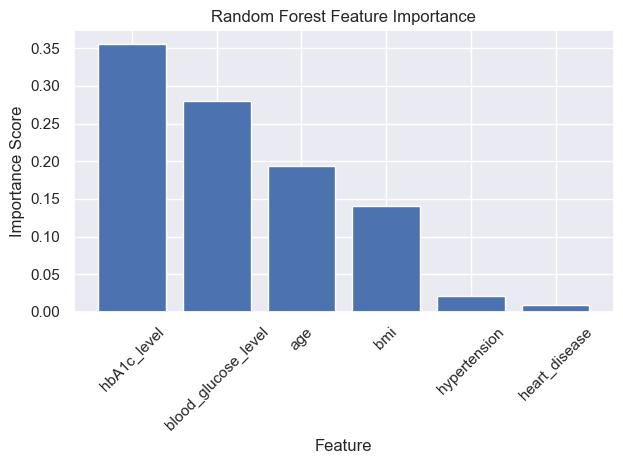

In [136]:
# Bar Chart of rainforest
plt.figure()
plt.bar(
    rf_importance["Feature"],
    rf_importance["Importance"]
)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Feature importance analysis from the Random Forest model indicated that both glycaemic and demographic factors contributed to diabetes classification.
HbA1c level was the most influential predictor (importance = 0.36), followed by blood glucose level (importance = 0.28), confirming the central role of
glycaemic control in diabetes identification. Age (importance = 0.19) and body mass index (importance = 0.14) showed moderate contributions, suggesting
that demographic and anthropometric characteristics provide additional predictive value beyond direct metabolic markers. In contrast, hypertension
(importance = 0.02) and heart disease (importance = 0.01) contributed minimally to the model’s predictions.

In [ ]:
# module 3: gradient boosting

In [116]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [117]:
# evaluate gradient boosting
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gb))
print("ROC–AUC (GB):", roc_auc_score(y_test, y_prob_gb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18298
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     19998
   macro avg       0.98      0.84      0.90     19998
weighted avg       0.97      0.97      0.97     19998

ROC–AUC (GB): 0.9770902155812593


In [ ]:
The Gradient Boosting model marginally outperformed Random Forest in overall discrimination, achieving a ROC–AUC of 0.98 and an accuracy of 97%. While 
specificity for non-diabetic individuals remained extremely high (recall = 1.00), the model identified diabetic cases with a recall of 0.69. Notably,
Gradient Boosting achieved a higher precision for the diabetic class (0.98), indicating fewer false positive classifications compared with Random Forest

In [119]:
# features importance
gb_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": gb.feature_importances_
}).sort_values(by="Importance", ascending=False)

gb_importance

,Feature,Importance
3,hbA1c_level,0.638560
2,blood_glucose_level,0.321429
0,age,0.022402
1,bmi,0.010776
4,hypertension,0.004029
5,heart_disease,0.002803


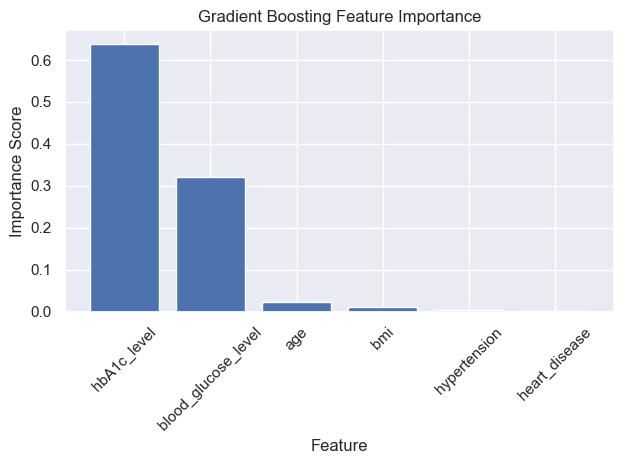

In [137]:
# Gradient boosting
plt.figure()
plt.bar(
    gb_importance["Feature"],
    gb_importance["Importance"]
)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Gradient Boosting Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Feature importance analysis from the Gradient Boosting model indicated that glycaemic biomarkers overwhelmingly dominated diabetes classification.
HbA1c level emerged as the most influential predictor (importance = 0.64), followed by blood glucose level (importance = 0.32), together accounting 
for more than 95% of the model’s predictive contribution. In contrast, age (importance = 0.02) and body mass index (importance = 0.01) played 
comparatively minor roles, while hypertension and heart disease contributed negligibly to the model’s predictions.

In [ ]:
In conclusion, the three models convey a consistent message: diabetes classification in this dataset is driven primarily by markers of glycaemic control.
Logistic regression provides transparent, directionally interpretable effects; Random Forest highlights the supplementary role of age and BMI through 
non-linear interactions; and Gradient Boosting focuses most strongly on direct metabolic indicators.